## Síntese de um compensador PID pelo método do lugar das raízes (*root locus*)

A função de transferência de malha aberta de um *piloto automático para o modo longitudinal (pitch) de um avião logo após retirar o trem de pouso frontal do solo no momento da decolagem* é:

\begin{align*}
        L(s)_{Ta\xrightarrow{} \theta} = \frac{0.0166 +0.000528 s+0.000328 s^2+3.05*10^{-7} s^3+6.33456*10^{-8} s^4}{-262625 -8353.09 s+ 278342 s^2+8901.38 s^3+5183.97 s^4+4.98525 s^5+s^6} 
\end{align*}


O sistema tem um polo de malha aberta no semi-plano direito, como pode ser observado na matriz de polos:

\begin{align*}
Polos \;=\;
\begin{pmatrix}
  -1.6413 +71.5637i \\
  -1.6413 -71.5637i\\
  -0.8515 + 7.3848i\\
  -0.8515 - 7.3848i\\
   0.9663 + 0.0000i\\
  -0.9660 + 0.0000i\\
\end{pmatrix}
\end{align*}

Como visto pela matriz de zeros, o sistema é do tipo 0:

\begin{align*}
Zeros \;=\;
\begin{pmatrix}
  -1.6133 +71.5521i \\
  -1.6133 -71.5521i \\
  -0.7975 + 7.1081i \\
  -0.7975 - 7.1081i \\
\end{pmatrix}
\end{align*}


In [ ]:
'''%pip install matplotlib 
%pip install ipympl 
%pip install numpy 
%pip install sympy 
%pip install control 
%pip install tbcontrol'''

%pip install matplotlib ipympl jupyter


In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import sympy as sp
import control as ct
from tbcontrol.symbolic import routh
import matplotlib.transforms as transforms
s = ct.tf([1, 0], [1])

In [2]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Função de transferência de malha aberta

In [3]:
zeros = np.array([-1.6133 + (71.5521j),  -1.6133 - (71.5521j),  -0.7975 + (7.1081j),  -0.7975 - (7.1081j)])
poles = np.array([-1.6413 + (71.5637j),  -1.6413 - (71.5637j),  -0.8515 + (7.3848j),  -0.8515 - (7.3848j),   0.9663,  -0.9660])

N = ct.tf(np.poly(zeros), [1])
D = ct.tf(np.poly(poles), [1])

L_0 = N/D
L_0

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05]), array([ 1.00000000e+00,  4.98530000e+00,  5.18397267e+03,  8.90145739e+03,
        2.78314545e+05, -8.39977113e+03, -2.64311757e+05]))

### 2. Determinação dos ganhos críticos via tabela de Routh

In [4]:
s_s = sp.symbols('s')
N_s = sp.Poly(np.poly(zeros), s_s)
D_s = sp.Poly(np.poly(poles), s_s)
N_s/D_s

(1.0*s**4 + 4.8216*s**3 + 5178.61327016*s**2 + 8335.15405231897*s + 262062.755077266)/(1.0*s**6 + 4.9853*s**5 + 5183.97267299*s**4 + 8901.45738838307*s**3 + 278314.545132264*s**2 - 8399.77113472094*s - 264311.756886443)

In [5]:
K_c = sp.symbols('K_c')
B_s = K_c * N_s + D_s

table_B = routh(B_s)
table_B

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1.0,               

In [6]:
sp.solve(table_B[2, 0] > 0, K_c)
print()
sp.solve(table_B[3, 0] > 0, K_c)
print()
sp.solve(table_B[4, 0] > 0, K_c)
print()
sp.solve(table_B[5, 0] > 0, K_c)
print()
sp.solve(table_B[6, 0] > 0, K_c)

((-103503.875614398 < K_c) & (K_c < -103486.976964407)) | ((-659.054585431138 < K_c) & (K_c < -659.054585431138)) | ((-9.86911122321739 < K_c) & (K_c < -9.86911122321739)) | ((0.941219991510892 < K_c) & (K_c < 0.941219991510894)) | ((1.00858192080181 < K_c) & (K_c < 3497.91392379392)) | ((3497.91392379399 < K_c) & (K_c < 5073.13675808718)) | ((5073.13675808738 < K_c) & (K_c < oo))

In [9]:
sp.solve(table_B[3, 0] > 0, K_c)

(-103495.42808964 < K_c) & (K_c < oo)

De fato, a planta é *condicionalmente estável*, ou seja, é possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K_c$) se, e somente se: $$−103495.428<Kc <
 ∞$$

### 3. Síntese de um controlador PID via lugar das raízes

#### 3.1. Síntese de um compensador proporcional 

Lugar das raízes de $L(s)$

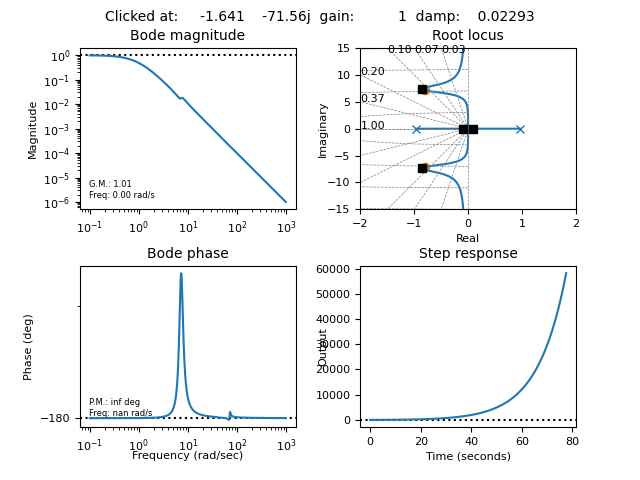

Clicked at     0.5161   +0.1266j gain     0.7378 damp    -0.9712
Clicked at     0.7387   +0.1266j gain      0.436 damp    -0.9856
Clicked at    -0.1921    +5.967j gain      45.23 damp    0.03218


In [22]:
'''def findlines(artist):
    return (isinstance(artist, plt.Line2D)
            and artist.get_linestyle()=='-'
            and isinstance(artist.get_xdata(), np.ndarray))

ct.rlocus(L_0)
plt.grid(True)
plt.title("Lugar das raízes do sistema em malha aberta")
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
h = plt.gca().findobj(match=lambda artist: isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-')

for i, h_ in enumerate(h): h_.set_color(f'C{i}')

# Limitando os eixos X e Y
plt.ylim([-60, 60])  # Defina os limites do eixo Y
plt.xlim([-60, 60])  # Defina os limites do eixo Y
plt.show()

'''
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-2, 2), ylim_rlocus=(-15, 15),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa


A partir do lugar das raízes $L(s)$, pode-se escolher como valor inicial para o ganho proporcional $K_p = 30.0$.

#### 3.2. Síntese de um compensador PI

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-integral* (PI), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PI}}(s) = \left( K_p + \frac{K_i}{s} \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} +  K_i \frac{N(s)}{s D(s)} = 0
    \\ 
    & s[D(s) + K_p N(s)] +  K_i N(s) = 0
    \\ 
    & 1 +  K_i \underbrace{\frac{N(s)}{s [D(s) + K_p N(s)]}}_{\displaystyle L_1(s)} = 0
\end{align*}


In [11]:
K_p = 65
L_1 = N/(s * (D + K_p * N))
L_1

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05]), array([1.00000000e+00, 4.98530000e+00, 5.24897267e+03, 9.21486139e+03,
       6.14924408e+05, 5.33385242e+05, 1.67697673e+07, 0.00000000e+00]))

Lugar das raízes de $L_1(s)$ e ajuste de $K_i$ 

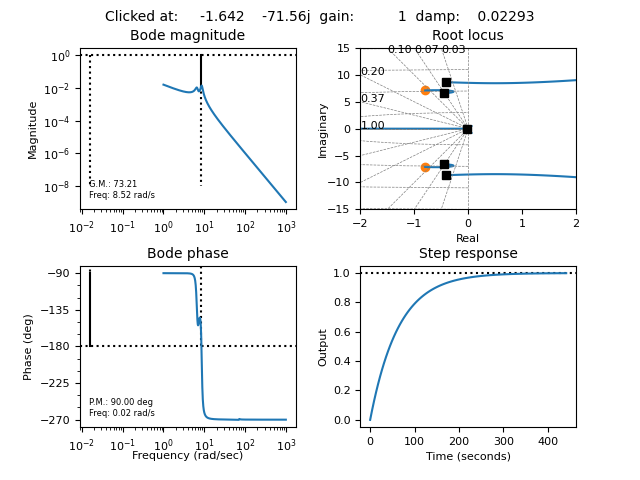

Clicked at    -0.5968  -0.05934j gain      38.41 damp     0.9951
Clicked at    -0.2776    +8.716j gain      19.36 damp    0.03184


In [12]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-2, 2), ylim_rlocus=(-15, 15),
            rlocus_grid=True)
plt.draw()  

A partir da análise do lugar das raízes para $L_1(s)$, chega-se a $K_i = 2.5 \ \text{s}^{-1}$ como escolha razoável para o ganho integral.

Assim pode-se calcular $T_i$ pela expressão:
$$T_i = \frac{K_p}{K_i}$$

In [13]:
K_i = 19
T_i = K_p/K_i
T_i

3.4210526315789473

Assumindo os valor calculados para $T_i$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PI}}(s) = K_c \left(1 + \frac{1}{T_i s}\right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s)N(s)}{s T_i D(s)}}_{\displaystyle L_2(s)} = 0
\end{align*}


In [14]:
L_2 = (1 + T_i * s) * N/(s * T_i * D)
L_2

TransferFunction(array([3.42105263e+00, 1.74949474e+01, 1.77211302e+04, 3.36936140e+04,
       9.04865632e+05, 2.62062755e+05]), array([ 3.42105263e+00,  1.70549737e+01,  1.77346434e+04,  3.04523542e+04,
        9.52128707e+05, -2.87360591e+04, -9.04224431e+05,  0.00000000e+00]))

Lugar das raízes de $L_2(s)$ e ajuste fino de $K_c$

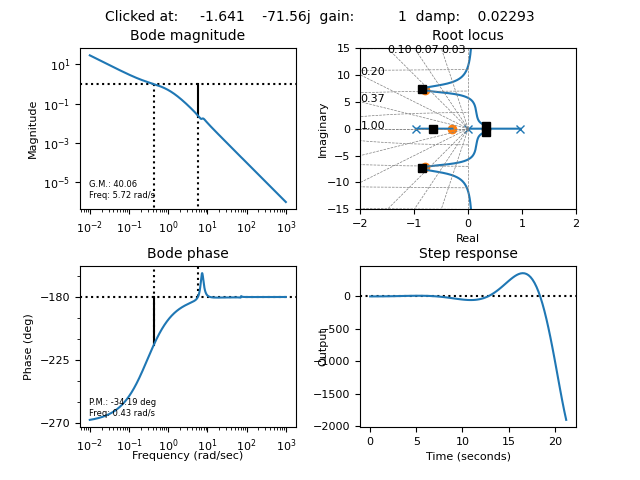

Clicked at    -0.2073     +6.82j gain      62.36 damp    0.03038
Clicked at    -0.5968    +6.634j gain      70.64 damp     0.0896
Clicked at    -0.6524    +8.679j gain      64.45 damp    0.07496
Clicked at    -0.6339    +8.865j gain       68.6 damp    0.07132
Clicked at    -0.6895  -0.05934j gain     0.8474 damp     0.9963
Clicked at    -0.5597    -6.381j gain      57.73 damp    0.08738
Clicked at    -0.3742     +5.89j gain      44.08 damp     0.0634
Clicked at    -0.3742     +6.82j gain      69.66 damp    0.05479
Clicked at    -0.3647    +8.686j gain      66.17 damp    0.04194
Clicked at    -0.3647    +8.441j gain      61.16 damp    0.04316


In [15]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_2, xlim_rlocus=(-2, 2), ylim_rlocus=(-15, 15),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Obtém-se assim $K_c = 30$, o que leva o seguinte compensador PI:

In [16]:
K_c_PI = 61

G_c_PI = K_c_PI * (1 + 1/(T_i * s))
G_c_PI

TransferFunction(array([208.68421053,  61.        ]), array([3.42105263, 0.        ]))

Diagrama de Bode do compensador PID sintetizado

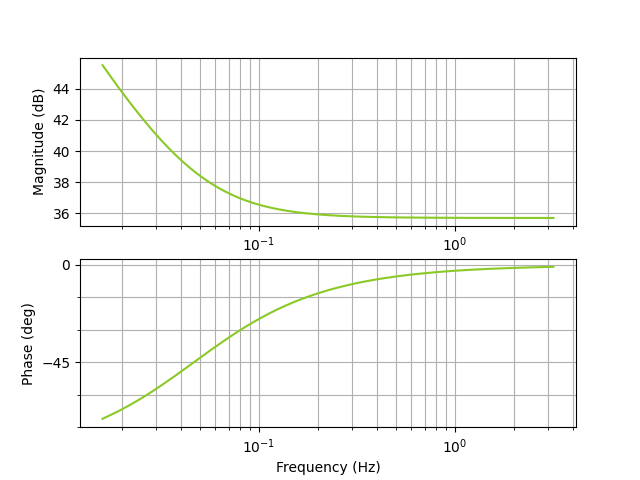

In [17]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PI,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['green'],
                                   dB=True, Hz=True)

#### 3.3. Síntese de um compensador PID

Podemos agora trocar o controlador *proporcional-integral* (PI) por um *proporcional-integral-derivativo* (PID), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PID}}(s) = \left( K_p + \frac{K_i}{s} + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + K_i \frac{N(s)}{s D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & s D(s) + (K_p s + K_i)N(s) + K_d s^2 N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s^2 N(s)}{s D(s) + (K_p s + K_i)N(s)}}_{\displaystyle L_3(s)} = 0
\end{align*}

In [18]:
L_3 = (s * s * N)/(s * D + (K_p * s + K_i) * N)
L_3

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05, 0.00000000e+00, 0.00000000e+00]), array([1.00000000e+00, 4.98530000e+00, 5.24897267e+03, 9.23386139e+03,
       6.15016018e+05, 6.31778894e+05, 1.69281353e+07, 4.97919235e+06]))

Lugar das raízes de $L_3(s)$ e ajuste de $K_d$

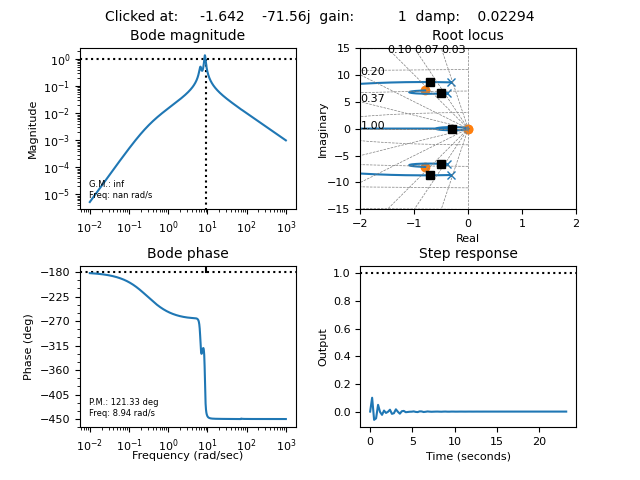

Clicked at    -0.8008     +6.82j gain      4.418 damp     0.1166
Clicked at     -1.153    -8.797j gain       2.15 damp       0.13
Clicked at    -0.4855   +0.3125j gain      70.12 damp     0.8409


In [20]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_3, xlim_rlocus=(-2, 2), ylim_rlocus=(-15, 15),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_3(s)$, chega-se a $K_d = 110 \ \text{s}$ como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [ ]:
K_d = 110.0
T_d = K_d/K_p
T_d

Finalmente, assumindo os valores calculados para $T_i$ e $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PID}}(s) = K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s + T_d T_i s^2)N(s)}{s T_i D(s)}}_{\displaystyle L_4(s)} = 0
\end{align*}


In [ ]:
L_4 = ((1 + T_i * s + T_d * T_i * s * s) * N)/(s * T_i * D)
L_4

Lugar das raízes de $L_4(s)$ e ajuste fino de $K_c$

In [ ]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_4, xlim_rlocus=(-2.1, 1.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Assim, adotando $K_c = 15$, tem-se o seguinte compensador PID:

In [ ]:
K_c_PID = 15.0
N_d = 1000

G_c_PID = K_c_PID * (1 + 1/(T_i * s) + (T_d * s)/(1 + T_d * s/N_d))
G_c_PID

Diagrama de Bode do compensador PID sintetizado

In [ ]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PID,
                                omega=np.linspace(0.1, 20, 1001),
                                color=cp['red'],
                                dB=True, Hz=True)

#### 3.4. Síntese de um compensador PD

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-derivativo* (PD), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PD}}(s) = \left( K_p + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & D(s) + K_p N(s) + K_d s N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s N(s)}{D(s) + K_p N(s)}}_{\displaystyle L_5(s)} = 0
\end{align*}

In [ ]:
L_5 = (s * N)/(D + K_p * N)
L_5

Lugar das raízes de $L_5(s)$ e ajuste de $K_d$

In [ ]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_5, xlim_rlocus=(-1.5, 0.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_5(s)$, chega-se a $K_d = 4 \ \text{s}$ como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [ ]:
K_d = 4
T_d = K_d/K_p
T_d

Finalmente, assumindo os valor calculado para $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PD}}(s) = K_c \left(1 + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 +  K_c \underbrace{\frac{\left(1 + T_d s \right) N(s)}{D(s)}}_{\displaystyle L_6(s)} = 0
\end{align*}

In [ ]:
L_6 = ((1 + T_d * s) * N)/D
L_6

Lugar das raízes de $L_6(s)$ e ajuste fino de $K_c$

In [ ]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_6, xlim_rlocus=(-2.1, 1.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Assim, adotando $K_c = 30, tem-se o seguinte compensador PD:


In [ ]:
K_c_PD = 30
N_d = 1000

G_c_PD = K_c_PD * (1 + (T_d * s)/(1 + T_d * s/N_d))
G_c_PD

Diagrama de Bode do compensador PD sintetizado

In [ ]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PD,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['blue'],
                                   dB=True, Hz=True)

### 4. Análise das respostas em malha fechada com compensadores PI, PD e PID

#### 4.1. Função de transferência entre referência (r) e saída (c)

In [ ]:
rc_tf_PI = ct.feedback(G_c_PI * L_0)
rc_tf_PD = ct.feedback(G_c_PD * L_0)
rc_tf_PID = ct.feedback(G_c_PID * L_0)
rc_tf_PID

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    rc_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    rc_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    rc_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.2. Função de transferência entre referência (r) e entrada de controle (u)

In [ ]:
ru_tf_PI = ct.feedback(G_c_PI, L_0)
ru_tf_PD = ct.feedback(G_c_PD, L_0)
ru_tf_PID = ct.feedback(G_c_PID, L_0)
ru_tf_PID

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    ru_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    ru_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    ru_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.3. Resposta a degrau

In [ ]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

# t, y_PI = ct.step_response(rc_tf_PI, ts)
# t, u_PI = ct.step_response(ru_tf_PI, ts)

t, y_PID = ct.step_response(rc_tf_PID, ts)
t, u_PID = ct.step_response(ru_tf_PID, ts)

t, y_PD = ct.step_response(rc_tf_PD, ts)
t, u_PD = ct.step_response(ru_tf_PD, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:], color=cp['green'], 
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 4.4. Resposta a rampa

In [ ]:
# simulação do sistema em MF
ts = np.linspace(0, 200, 2000)

# t, y_PI = ct.forced_response(rc_tf_PI, ts, U=ts)
# t, u_PI = ct.forced_response(ru_tf_PI, ts, U=ts)

t, y_PID = ct.forced_response(rc_tf_PID, ts, U=ts)
t, u_PID = ct.forced_response(ru_tf_PID, ts, U=ts)

t, y_PD = ct.forced_response(rc_tf_PD, ts, U=ts)
t, u_PD = ct.forced_response(ru_tf_PD, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:], color=cp['green'],
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()